# Case 11 - Introduction to Classification and KNN methods

**Context.** 

You are an analyst at a Colombian EPS. This company has decided that needs to imporove its hability to detect breast cancer.

**Problem.** 

You are requiered to develop a model capable of classifying patients´ tumors into malign or benign

**Analytical Context.** 

You must use a KNN classification method in order to understand the different groups existing in the dataset.

The regression models that we have seen so far are models that assume that the response variable $Y$ is quantitative. However, in some cases the response variable is **qualitative**. The qualitative variables are also called **categorical**, as the response variable for an observation can take a value from one of different categories. For example, eye color is a categorical variable as it can take one of the following values: brown, green or blue. From now on we will see how to approach problems in which a qualitative response has to be predicted. This type of problems are **classification** problems. Predicting a qualitative response for an observation can be referred to as **classifying** that observation, as it involves assigning the observation to a category, or class. Most of the models used for classification first calculate the probability of an observation to belong to each one of the possible categories in order to classify it based on those probabilities. On that account, most of the classification models can be seen as modified regression models that predict probabilities and then classifies based on those probabilities. 

As classification problems have a different purpose than regression problems, the models and metrics used for classification are different than the ones used for regression. In this module we will see the most common metrics used to assess classification models' performance. Additionally, we will talk about the K-nearest neighbors model, which is the most basic classifying model.

## Overview on classification problems

Classification problems occur as often, or more often, than regression problems. Some examples of classification problems include: 

1. A person enters the emergency room with a set of symptoms that are associated with one of four medical conditions. Which medical condition does the pacient have?   
2. A banking service application has to classify a transaction that is being made as fraudulent or as non-fraudulent based on the user's past transaction history, the location in which the transaction is being made, and so forth.
3. Based on the DNA sequence data for a number of patients with and without a given disease, a biologist would like to figure out which DNA mutations are deleterious (disease-causing) and which are not.

Just as in the regression problems, for classification problems we will have a sample which contains the value of the input variables ($\textbf{x}$) and output variables ($Y$) for the observations that were taken. This dataset can also be divided in a training set, a validation set and a test set. In addition, as in regression problems, the main purpose of the classification models is to perform well on observations that have not been seen by the model.

## Why not linear regression?

We have stated that linear regression is not an appropriate model for classification problems. But, why not? Suppose, that we are trying to diagnose a patient based on their symptoms. For this example, the only possible diagnostics are drug overdose, epileptic seizure and stroke. Then, the encoding of the values can be encoded as a quantitative response as follows: <center> $
Y = \left\{
    \begin{matrix}
        1, \ \text {if \ drug \ overdose} \\
        2, \ \text {if \ epileptic \ seizure} \\
        3, \ \text {if \ stroke}
    \end{matrix}
\right.
$ </center>

Using this coding, least squares could be used to fit a linear regression model to predict Y on the basis of a set of predictors $\textbf{x}_1,...,\textbf{x}_m$. However, this coding implies an ordering on the outcomes, putting epileptic seizure in between stroke and drug overdose, and stating that the difference between stroke and epileptic seizure is the same as the difference between epileptic seizure and drug overdose. In practice, there is no particular reason for this encoding to be the one to be used. For instance, one could choose another equally reasonable coding which would imply a totally different relationship among the three conditions: <center> $
Y = \left\{
    \begin{matrix}
        1, \ \text {if \ epileptic \ seizure} \\
        2, \ \text {if \ drug \ overdose} \\
        3, \ \text {if \ stroke}
    \end{matrix}
\right.
$ </center>

Each of the possible encodings that can be used for this problem will yield a different least squares estimate. 

If the response variable’s values did take on a natural ordering, such as mild, moderate, and severe, and the gap between mild and moderate was similar to the gap between moderate and severe, then a 1, 2, 3 coding would be reasonable. Unfortunately, in general there is no natural way to convert a qualitative response variable with more than two levels into a quantitative response that is ready for linear regression.

For a binary qualitative response (a response with two levels), the situation is better. For a binary instance of the previous problem, there are only two possibilities for the patient’s medical condition: stroke and drug overdose. Then, one could then potentially use a dummy variable to code the response as follows:<center> $
Y = \left\{
    \begin{matrix}
        0, \ \text {if \ stroke} \\
        1, \ \text {if \ drug \ overdose} \\
    \end{matrix}
\right.
$ </center>

Then a linear regression could be fit to this binary response, and predict "drug overdose" if $\hat Y > 0.5$ and "stroke" otherwise. In the binary case it is not hard to show that even if we flip the coding above, linear regression will produce the same final predictions. For a binary response with a 0/1 coding as above, regression by least squares does make sense; it can be shown that the $\textbf{x}\hat\beta$ obtained using linear regression is in fact an estimate of $P(drug overdose|X)$. However, if linear regression is used, some of the estimates might be outside the [0, 1] interval, making them hard to interpret as probabilities! Nevertheless, the predictions provide an ordering and can be interpreted as crude probability estimates. However, the dummy variable approach cannot be easily extended to accommodate qualitative responses with more than two levels. For these reasons, it is preferable to use a classification method that is truly suited for qualitative response values, such as the ones presented next.

# K-nearest neighbors

The $K$-nearest neighbors classifier (KNN) is a very simple approach for a classification problem. Given a positive integer $K$ and a test observation $x_0$, the KNN classifier first identifies the neighbors $K$ points in the training data that are closest to $x_0$, represented by $N_0$. It then estimates the conditional probability for class $j$ as the fraction of points in $N_0$ whose response values equal j:<center> $P(Y=j|\textbf{x}=x_0)= \frac{1}{K}\sum_{i\in N_0} I(y_i=j)$ </center>

Finally, the classifier classifies the test observation $x_0$ to the class with the higher probability.

The figure below provides an illustrative example of the KNN approach. 

<figure>
<img src="/work/indu5012_case_11/fig/KNN.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 11.1 - KNN illustrative example</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

In the left-hand panel, a small training data set consisting of six blue and six orange observations are plotted. The goal is to make a prediction for the point labeled by the black cross. Suppose that we choose $K$ = 3. Then, KNN will first identify the three observations that are closest to the cross. This neighborhood is shown as a circle. It consists of two blue points and one orange point, resulting in estimated probabilities of 2/3 for the blue class and 1/3 for the orange class. Hence, KNN will predict that the black cross belongs to the blue class. In the right-hand panel of the figure the KNN approach with K = 3 was applied at all of the possible values for X1 and X2, and the  corresponding KNN decision boundary was drawn.

The choice of $K$ has a drastic effect on the KNN classifier obtained. The figure below displays two KNN fits to a simulated dataset using K = 1 and K = 100:

<figure>
<img src="/work/indu5012_case_11/fig/KNN_comparison.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 11.2 - KNN comparison when using K=1 and K=100</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

When K = 1, the decision boundary is very flexible. This corresponds to a classifier that has low bias but very high variance. As K grows, the method becomes less flexible and produces a decision boundary that is close to linear. This corresponds to a low-variance but high-bias classifier. On this simulated data set, neither K = 1 nor K = 100 give good predictions: they have validation error rates of 0.1695 and 0.1925, respectively. Just as in the regression setting, there is not a strong relationship between the training error rate and the test error rate. With K = 1, the
KNN training error rate is 0, but the test error rate may be quite high. In general, as we use more flexible classification methods, the training error rate will decline but the test error rate may not. In the figure below, we have the KNN test and training errors as a function of 1/K were plotted

<figure>
<img src="/work/indu5012_case_11/fig/KNN_error.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 11.3 - KNN error rates when using different values of K</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 


As 1/K increases, the method becomes more flexible. As in the regression setting, the training error rate consistently declines as the flexibility increases. However, the test error exhibits a characteristic U-shape, declining at first (with a minimum at approximately K = 10) before increasing again when the method becomes excessively flexible and overfits.


## Performance metrics for classification problems

As classification problems differ from regression problems in intention, the metrics used in regression problems cannot be used in classification problems. The metrics used in classification problems differ greatly from one another in their intention. In order to define the way to calculate every matrix, let us examine the **confusion matrix** first. This matrix allows to visualize the correct and incorrect classifications that result from our model. 
<center>
<table>
    <thead>
        <tr>
            <th></th>
            <th></th>
            <th colspan=2 ><center>Actual Values </center></th>
        </tr>
        <tr>
            <th></th>
            <th></th>
            <th><center>Negative (0)</th>
            <th><center>Positive (1)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=2><b>Predicted values </b></td>
            <td><center><b>Negative (0)</td>
            <td><center>True Negatives (TN)</td>
            <td><center>False Negatives (FN)</td>
        </tr>
        <tr>
            <td><center><b>Positive (1)</td>
            <td><center>False Positives (FP)</td>
            <td><center>True Positives (TP)</td>
    </tbody>
</table>
</center>

As it can be seen, it is wanted that most of the values in the sample fall on the diagonal values of the matrix, as that would mean that most of the observations on the sample were correctly classified. Using the notation present on the confusion matrix, let us take a look at the different performance metrics that can be used for classification problems.

The first metric is a very basic one, the **accuracy** of the model. The accuracy measures the proportion of observations that were classified correctly: <center> $\text{Accuracy}=  \frac{TP+TN}{TP+FP+TN+FN}$ </center>  

Accuracy is simple to calculate but has its own disadvantages. If the data set is highly imbalanced, and the model classifies all the data points as the majority class data points, the accuracy will be high. This makes accuracy not a reliable performance metric for imbalanced data. For example, if 90% of the data were positives, then a classifier that predicts all of the observations as positive would then have an accuracy of 90%, but this would not mean that the classifier is a good one. 

The second metric is the **precision**. Precision measures the proportion of observations predicted as positives thet were correctly classified. The precision is calculated as following: <center> $\text{Precision}=  \frac{TP}{TP+FP}$ </center>

If your classification problem is one in which it is really important that the observations that are classified as positives are truly positives, then the precision score might be the most relevant metric to measure the classification model's performance. An example of a problem in which the precision score is really important is one in which the objective is to classify people on trial as guilty or not; in this problem it is wanted that people classified as guilty are truly guilty.

The third metric is the **recall**. Recall measures the proportion of positives thet were correctly classified. The recall is calculated as following: <center> $\text{Recall}=  \frac{TP}{TP+FN}$ </center>

If your classification problem is one in which it is much more important to correctly classify the positives, then the recall score might be the most relevant metric to measure the classification model's performance. An example of a problem in which the recall might be a very important metric is one in which people have to be classified as having covid or not having covid; in this problem it is wanted that most of the people that have covid are correctly classified.

The fourth metric is the **f1 score**. The f1 score is the harmonic mean of the recall and the precision of the model. The f1 socre is calculated as following: <center> $f_1=  \frac{2precision*recall}{precision+recall}$ </center>

The f1 score takes values from 0 (when either the recall or the precision is equal to 0) to 1 (when both precision and recall are equal to 1).

The fifth metric is the area under the curve (**AUC**) of the Receiver Operating Characteristic (ROC) curve. The ROC curve is a curve that allows one to summarize all of the confusion matrices that a model can create by changing its classification threshold. The classification threshold is the cutoff point for the calculated probability that separates the observations classsified as positive and the observations classified as negative. For example, if the cut-off is 0.6, only the observation with a probability of being positive of over 60% are classified as positive and the other ones are classified as negative. The ROC curve is a plot that on the x-axis plots the false positive rate ($FPR=\frac{FP}{TN+FP}$) and on the y-axis plots the recall (or sensitivity) of the model. An example for a ROC curve can be seen below:

<figure>
<img src="/work/indu5012_case_11/fig/ROC.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 5.4 - ROC curve example for a LDA model</b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 

As one would prefer to have the highest true positive rate (recall) and the lowest false positive rate, the one would prefer one's model to have values up and to the left on the ROC curve. Taking that into account, one can calculate the area under the ROC curve to measure how aup and to the left the results of a model are. As one model will generate one ROC, the AUC can be used to compare different types of models.
 



## K-nearest neighbors example

After seeing the some metrics to measure the performance of a classification model and after seeing the K-nearest neighbors classifier, lest us see an example of how to choose the best KNN model based on different metrics. For this purpose, we are going to use a dataset that has 569 observations of people that had either a benign or a malignat tumor in their breast.

### Data Import

In [11]:
#Importing libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns

cancer_data = load_breast_cancer()
df_cancer = pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)
df_cancer['Tumor'] = pd.Series(cancer_data.target)

### EDA

In [9]:
df_cancer.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Tumor
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df_cancer['Tumor'].unique()

array([0, 1])

<AxesSubplot:xlabel='Tumor', ylabel='Count'>

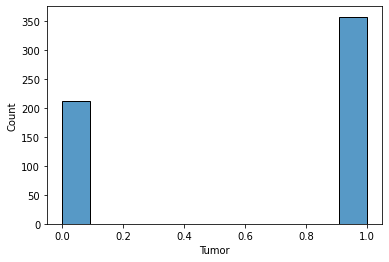

In [14]:
sns.histplot(df_cancer['Tumor'])

### Model Training and Validation

In [6]:
#Importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

#Definition of input variables
X = df_cancer.drop(columns='Tumor')
#Definition of output variable
y = df_cancer['Tumor']

knn = KNeighborsClassifier(n_neighbors=20)

scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print("Accuracy: ",scores.mean())

scores = cross_val_score(knn, X, y, cv=10, scoring='recall')
print("Recall: ",scores.mean())

scores = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')
print("Roc_auc: ",scores.mean())

[0.87719298 0.85964912 0.9122807  0.96491228 0.94736842 0.94736842
 0.96491228 0.94736842 0.92982456 0.94642857]
Accuracy:  0.9297305764411027
Recall:  0.9692063492063492
Roc_auc:  0.9748532948532949


In [3]:
from sklearn.model_selection import GridSearchCV

grid_values = {'n_neighbors': list(range(1, 31))}

knn = KNeighborsClassifier()

# default metric to optimize over grid parameters: accuracy
grid = GridSearchCV(knn, grid_values, cv=10, scoring='f1')
grid.fit(X, y)

# Best estimators
print("Best KNN neighbors: ",grid.best_estimator_)
print('Best KNN f1 score: %.3f' % np.abs(grid.best_score_))

Best KNN neighbors:  KNeighborsClassifier(n_neighbors=19)
Best KNN f1 score: 0.947


In [4]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X,y)
knn.predict(X)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96262903-a28f-4719-a328-dc59e3cfa77f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>